# A simple static-size population model of Wright-Fisher for educational purposes:

## Lesson Three: Drift
</b>

In [1]:
import copy as cp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)
sns.set_context("poster")

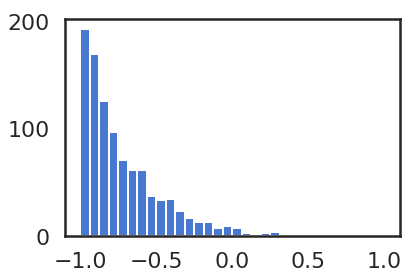

In [2]:
Natural = np.random.exponential(scale=1, size=1000)
Highfit = np.random.normal(scale=1, size=1000)
Lowfit = np.random.poisson(size=1000)
# mut_effect = np.interp(Highfit, (Highfit.min(), Highfit.max()), (-1, 1))
mut_effect = np.interp(Natural, (Natural.min(), Natural.max()), (-1, 1))
# mut_effect = np.interp(Lowfit, (Lowfit.min(), Lowfit.max()), (-1, 1))
plot=plt.hist(mut_effect, bins='auto')
# only one of the mut_effects can be active, depending on the problem you are facing, we provided three.

In [20]:
def get_mut_num():
    return np.random.poisson(U)
def mutate():
    mut_num = get_mut_num()
#         print (mut_num)
    if mut_num > 0 or w > 0:
        for i in range(mut_num):
            s = np.random.choice(mut_effect)
                if s == -1.:
                    self.w = 0.0
            w += s
            return w
    return w

In [6]:
class WrightFisher(object):

    def __init__(self, N, U):
        self.pop_size = N
        self.mut_rate = U # can this be integrated in the Genotype class as self.U?
        self.population = []
        for j in range(self.pop_size):
            self.population.append((Genotype(self.mut_rate,j)))

    @property
    def w_pop(self):
        return [i.w for i in self.population]
    
    @property
    def gen_freq(self):
        allel_freq={}
        ind_freq=[i.index for i in self.population]
        for i in range (self.pop_size):
            allel_freq[i]=ind_freq.count(i)
        return allel_freq
    
    @property
    def fixation_time(self):
        pass
        

# do we need to keep this?
    def plot_w_dist(self):
        plt.hist(self.w_pop)

# Exercise 3: uncomment the two lines in get_next_gen function to enable mutations.
    def get_next_gen(self):
        current_gen_parents = copy.deepcopy(self.population)
        for i in current_gen_parents:
            i.mutate()
        next_gen_offspring = copy.deepcopy(current_gen_parents)
        cum_fitness = np.cumsum([i.w for i in next_gen_offspring])
        rand_array = np.random.random_sample(self.pop_size)
#         mult_rand_array = np.multiply(rand_array, cum_fitness[self.pop_size - 1])
#         indices = np.searchsorted(cum_fitness, mult_rand_array)
        next_generation = []
#         for i in range(self.pop_size):
#             next_generation.append(next_gen_offspring[indices[i]])
        self.population = copy.deepcopy(next_generation)

    def sim(self,gen):
        self.w_t_series = []
        self.gen_t_series = {}
        for i in range(gen):
            self.gen_t_series[i] = self.gen_freq
            self.get_next_gen()
            self.w_t_series.append(np.mean(self.w_pop))